In [24]:
# Importamos las librerias que vamos a utilizar
import matplotlib.pyplot as plt
import pandas as pd
import re
#from funciones import extraer_campo

In [25]:
# Creamos una lista de los campos de búsqueda
campos_busqueda = ['kw', 'au', 'mc-itype', 'ti', 'an', 'itype', 'su', 'BC', 'bc', 'callnum', 
    'I-format', 'AU', 'YE', 'an', 'se', 'In', 'bx', 'se', 'su-to', 'mc-itype,phr', 'l-format', 'Provider']

# Creamos una expresión regular para encontrar los campos
patrones = r'\b(?:' + '|'.join(campos_busqueda) + r')\b'

# Funcion para extraer el campo de cada fila
def extraer_campo(texto):
    """
    Extrae un campo específico de un texto dado utilizando una expresión regular.
    Args:
        texto (str): El texto del cual se desea extraer el campo.
    Returns:
        str or None: El campo extraído si se encuentra una coincidencia, de lo contrario, None.
    """
    match = re.search(patrones, texto)
    return match.group(0) if match else None

In [26]:
# Abrimos el archivo 'Estadisticas consultas catálogo-reportresults.csv' que contiene los datos de la busqueda de los usuarios en el sistema Koha
data_frame = pd.read_csv("d:/Users/Laura/Desktop/Espacio Integrador II/3 - Practica Academica/Practica-Acad-mica/1 - archivos/Estadísticas consultas catálogo-reportresults.csv", sep=';')

### Identificación de las variables más importantes
##### Se identificarán las variables que ayudarán a resolver nuestro problema

In [27]:
# Filtramos el data frame, nos quedaremos con las variables que resolverán nuestro problema
df_filtrado = data_frame[['sessionid', 'query_desc', 'total', 'time', 'categorycode']]

# Mostramos las primeras filas del data frame filtrado
df_filtrado.head()

,sessionid,query_desc,total,time,categorycode
0,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",16,2018-10-17 15:27:49,DOCENTE
1,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",16,2018-10-17 15:28:25,DOCENTE
2,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",10,2018-10-17 15:29:51,DOCENTE
3,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",10,2018-10-17 15:30:02,DOCENTE
4,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",10,2018-10-17 15:30:13,DOCENTE


### Etapa de limpieza

In [28]:
# Borramos valores duplicados en el data frame filtrado
df_filtrado.drop_duplicates()

print("Cantidad de filas duplicadas eliminadas:", len(df_filtrado) - len(df_filtrado.drop_duplicates()))

Cantidad de filas duplicadas eliminadas: 65


In [29]:
# Nos fijamos si las columnas tienen algún valor nulo
df_filtrado.info()

# Podemos observar que de las 2535 filas ninguna posee valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sessionid     2535 non-null   object
 1   query_desc    2535 non-null   object
 2   total         2535 non-null   int64 
 3   time          2535 non-null   object
 4   categorycode  2535 non-null   object
dtypes: int64(1), object(4)
memory usage: 99.2+ KB


In [30]:
# Guardamos el DataFrame filtrado en un archivo CSV, para poder trabajar en otras ramas
df_filtrado.to_csv('1 - archivos/df_filtrado.csv', index=False)

### Imputación de los campos de búsqueda de los usuarios

In [31]:
# Buscamos las búsquedas que no tienen un campo ingresado
filas_sin_query = df_filtrado[~ df_filtrado['query_desc'].str.contains(patrones, na=False)]

In [32]:
# Imputamos las filas que no tienen campos ingresados
filas_sin_query.loc[filas_sin_query.index == 750, 'query_desc'] = filas_sin_query.loc[750, 'query_desc'].replace('robot', 'kw: robot')
filas_sin_query.loc[filas_sin_query.index == 752, 'query_desc'] = filas_sin_query.loc[752, 'query_desc'].replace('robot', 'kw: robot')
filas_sin_query.loc[filas_sin_query.index == 754, 'query_desc'] = filas_sin_query.loc[754, 'query_desc'].replace('da vinci', 'kw,wrdl: da vinci')
filas_sin_query.loc[filas_sin_query.index == 756, 'query_desc'] = filas_sin_query.loc[756, 'query_desc'].replace('robotica', 'kw: robotica')

In [33]:
# Actualizamos los valores de los campos de busqueda en el data frame principal
df_filtrado.update(filas_sin_query)

### Preparación de los datos para el análisis estadístico

In [34]:
# Aplicar la función para crear una nueva columna 'campos_utilzado'
df_filtrado.loc[:, 'campo_utilizado'] = df_filtrado['query_desc'].apply(extraer_campo)

C:\Users\Laura\AppData\Local\Temp\ipykernel_5248\1394677314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[:, 'campo_utilizado'] = df_filtrado['query_desc'].apply(extraer_campo)


In [37]:
# Pero como no se guardan todos los campos que utilizo el usuario, tendremos que realizar otra imputacion para estos casos
df_filtrado['contador'] = df_filtrado['query_desc'].str.count(':')
dos_puntos = df_filtrado[df_filtrado['contador'] > 1]
df_filtrado.drop('contador', axis=1, inplace=True)

In [38]:
# Imputación de los campos utilizados por los usuarios para hacer la busqueda
df_filtrado.loc[5, 'campo_utilizado'] = (df_filtrado.loc[5, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[6, 'campo_utilizado'] = (df_filtrado.loc[6, 'campo_utilizado'] + ', su-to' + ', su-to')
df_filtrado.loc[7, 'campo_utilizado'] = (df_filtrado.loc[7, 'campo_utilizado'] + ', su-to' + ', su-to' + ', su-to')
df_filtrado.loc[8, 'campo_utilizado'] = (df_filtrado.loc[8, 'campo_utilizado'] + ', su-to' + ', su-to')
df_filtrado.loc[9, 'campo_utilizado'] = (df_filtrado.loc[9, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[10, 'campo_utilizado'] = (df_filtrado.loc[10, 'campo_utilizado'] + ', su-to' + ', su-to')
df_filtrado.loc[11, 'campo_utilizado'] = (df_filtrado.loc[11, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[29, 'campo_utilizado'] = (df_filtrado.loc[29, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[33, 'campo_utilizado'] = (df_filtrado.loc[33, 'campo_utilizado'] + ', itype')
df_filtrado.loc[35, 'campo_utilizado'] = (df_filtrado.loc[35, 'campo_utilizado'] + ', itype')
df_filtrado.loc[48, 'campo_utilizado'] = (df_filtrado.loc[48, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[49, 'campo_utilizado'] = (df_filtrado.loc[49, 'campo_utilizado'] + ', mc-itype' + ', mc-itype')
df_filtrado.loc[111, 'campo_utilizado'] = (df_filtrado.loc[111, 'campo_utilizado'] + ', au')
df_filtrado.loc[252, 'campo_utilizado'] = (df_filtrado.loc[252, 'campo_utilizado'] + ', I-format')
df_filtrado.loc[256, 'campo_utilizado'] = (df_filtrado.loc[256, 'campo_utilizado'] + ', I-format')
df_filtrado.loc[277, 'campo_utilizado'] = (df_filtrado.loc[277, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[288, 'campo_utilizado'] = (df_filtrado.loc[288, 'campo_utilizado'] + ', au')
df_filtrado.loc[358, 'campo_utilizado'] = (df_filtrado.loc[358, 'campo_utilizado'] + ', ti'+ ', not au')
df_filtrado.loc[368, 'campo_utilizado'] = (df_filtrado.loc[368, 'campo_utilizado'] + ', itype')
df_filtrado.loc[374, 'campo_utilizado'] = (df_filtrado.loc[374, 'campo_utilizado'] + ', itype')
df_filtrado.loc[395, 'campo_utilizado'] = (df_filtrado.loc[395, 'campo_utilizado'] + ', itype')
df_filtrado.loc[397, 'campo_utilizado'] = (df_filtrado.loc[397, 'campo_utilizado'] + ', itype')
df_filtrado.loc[429, 'campo_utilizado'] = (df_filtrado.loc[429, 'campo_utilizado'] + ', itype')
df_filtrado.loc[431, 'campo_utilizado'] = (df_filtrado.loc[431, 'campo_utilizado'] + ', itype')
df_filtrado.loc[432, 'campo_utilizado'] = (df_filtrado.loc[432, 'campo_utilizado'] + ', itype')
df_filtrado.loc[444, 'campo_utilizado'] = (df_filtrado.loc[444, 'campo_utilizado'] + ', itype')
df_filtrado.loc[453, 'campo_utilizado'] = (df_filtrado.loc[453, 'campo_utilizado'] + ', su')
df_filtrado.loc[628, 'campo_utilizado'] = (df_filtrado.loc[628, 'campo_utilizado'] + ', au')
df_filtrado.loc[636, 'campo_utilizado'] = (df_filtrado.loc[636, 'campo_utilizado'] + ', itype')
df_filtrado.loc[637, 'campo_utilizado'] = (df_filtrado.loc[637, 'campo_utilizado'] + ', itype')
df_filtrado.loc[649, 'campo_utilizado'] = (df_filtrado.loc[649, 'campo_utilizado'] + ', au')
df_filtrado.loc[746, 'campo_utilizado'] = (df_filtrado.loc[746, 'campo_utilizado'] + ', itype')
df_filtrado.loc[747, 'campo_utilizado'] = (df_filtrado.loc[747, 'campo_utilizado'] + ', itype')
df_filtrado.loc[749, 'campo_utilizado'] = (df_filtrado.loc[749, 'campo_utilizado'] + ', itype')
df_filtrado.loc[768, 'campo_utilizado'] = (df_filtrado.loc[768, 'campo_utilizado'] + ', itype')
df_filtrado.loc[773, 'campo_utilizado'] = (df_filtrado.loc[773, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[774, 'campo_utilizado'] = (df_filtrado.loc[774, 'campo_utilizado'] + ', se')
df_filtrado.loc[775, 'campo_utilizado'] = (df_filtrado.loc[775, 'campo_utilizado'] + ', itype')
df_filtrado.loc[776, 'campo_utilizado'] = (df_filtrado.loc[776, 'campo_utilizado'] + ', itype')
df_filtrado.loc[779, 'campo_utilizado'] = (df_filtrado.loc[779, 'campo_utilizado'] + ', au')
df_filtrado.loc[780, 'campo_utilizado'] = (df_filtrado.loc[780, 'campo_utilizado'] + ', au')
df_filtrado.loc[862, 'campo_utilizado'] = (df_filtrado.loc[862, 'campo_utilizado'] + ', itype')
df_filtrado.loc[868, 'campo_utilizado'] = (df_filtrado.loc[868, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[869, 'campo_utilizado'] = (df_filtrado.loc[869, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[884, 'campo_utilizado'] = (df_filtrado.loc[884, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[964, 'campo_utilizado'] = (df_filtrado.loc[964, 'campo_utilizado'] + ', au')
df_filtrado.loc[974, 'campo_utilizado'] = (df_filtrado.loc[974, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[975, 'campo_utilizado'] = (df_filtrado.loc[975, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1117, 'campo_utilizado'] = (df_filtrado.loc[1117, 'campo_utilizado'] + ', au')
df_filtrado.loc[1119, 'campo_utilizado'] = (df_filtrado.loc[1119, 'campo_utilizado'] + ', au')
df_filtrado.loc[1131, 'campo_utilizado'] = (df_filtrado.loc[1131, 'campo_utilizado'] + ', au')
df_filtrado.loc[1187, 'campo_utilizado'] = (df_filtrado.loc[1187, 'campo_utilizado'] + ', au')
df_filtrado.loc[1188, 'campo_utilizado'] = (df_filtrado.loc[1188, 'campo_utilizado'] + ', au')
df_filtrado.loc[1189, 'campo_utilizado'] = (df_filtrado.loc[1189, 'campo_utilizado'] + ', au' + ', mc-itype' + ', mc-itype')
df_filtrado.loc[1196, 'campo_utilizado'] = (df_filtrado.loc[1196, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1223, 'campo_utilizado'] = (df_filtrado.loc[1223, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1273, 'campo_utilizado'] = (df_filtrado.loc[1273, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1275, 'campo_utilizado'] = (df_filtrado.loc[1275, 'campo_utilizado'] + ', au')
df_filtrado.loc[1302, 'campo_utilizado'] = (df_filtrado.loc[1302, 'campo_utilizado'] + ', kw' + ', mc-itype')
df_filtrado.loc[1303, 'campo_utilizado'] = (df_filtrado.loc[1303, 'campo_utilizado'] + ', kw' + ', mc-itype')
df_filtrado.loc[1304, 'campo_utilizado'] = (df_filtrado.loc[1304, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1305, 'campo_utilizado'] = (df_filtrado.loc[1305, 'campo_utilizado'] + ', ti')
df_filtrado.loc[1306, 'campo_utilizado'] = (df_filtrado.loc[1306, 'campo_utilizado'] + ', ti' + ', mc-itype' + ', mc-itype')
df_filtrado.loc[1307, 'campo_utilizado'] = (df_filtrado.loc[1307, 'campo_utilizado'] + ', ti' + ', In')
df_filtrado.loc[1384, 'campo_utilizado'] = (df_filtrado.loc[1384, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1435, 'campo_utilizado'] = (df_filtrado.loc[1435, 'campo_utilizado'] + ', bx')
df_filtrado.loc[1470, 'campo_utilizado'] = (df_filtrado.loc[1470, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1471, 'campo_utilizado'] = (df_filtrado.loc[1471, 'campo_utilizado'] + ', itype' + ', su-to')
df_filtrado.loc[1472, 'campo_utilizado'] = (df_filtrado.loc[1472, 'campo_utilizado'] + ', itype' + ', su-to')
df_filtrado.loc[1473, 'campo_utilizado'] = (df_filtrado.loc[1473, 'campo_utilizado'] + ', itype' + ', su-to')
df_filtrado.loc[1474, 'campo_utilizado'] = (df_filtrado.loc[1474, 'campo_utilizado'] + ', itype' + ', su-to')
df_filtrado.loc[1475, 'campo_utilizado'] = (df_filtrado.loc[1475, 'campo_utilizado'] + ', itype' + ', su-to' + ', au')
df_filtrado.loc[1494, 'campo_utilizado'] = (df_filtrado.loc[1494, 'campo_utilizado'] + ', au')
df_filtrado.loc[1593, 'campo_utilizado'] = (df_filtrado.loc[1593, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1594, 'campo_utilizado'] = (df_filtrado.loc[1594, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1596, 'campo_utilizado'] = (df_filtrado.loc[1596, 'campo_utilizado'] + ', kw')
df_filtrado.loc[1597, 'campo_utilizado'] = (df_filtrado.loc[1597, 'campo_utilizado'] + ', kw' + ', mc-itype')
df_filtrado.loc[1658, 'campo_utilizado'] = (df_filtrado.loc[1658, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1731, 'campo_utilizado'] = (df_filtrado.loc[1731, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1769, 'campo_utilizado'] = (df_filtrado.loc[1769, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1782, 'campo_utilizado'] = (df_filtrado.loc[1782, 'campo_utilizado'] + ', su-to')
df_filtrado.loc[1841, 'campo_utilizado'] = (df_filtrado.loc[1841, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1842, 'campo_utilizado'] = (df_filtrado.loc[1842, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1845, 'campo_utilizado'] = (df_filtrado.loc[1845, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1880, 'campo_utilizado'] = (df_filtrado.loc[1880, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1961, 'campo_utilizado'] = (df_filtrado.loc[1961, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1962, 'campo_utilizado'] = (df_filtrado.loc[1962, 'campo_utilizado'] + ', mc-itype')
df_filtrado.loc[1968, 'campo_utilizado'] = (df_filtrado.loc[1968, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1969, 'campo_utilizado'] = (df_filtrado.loc[1969, 'campo_utilizado'] + ', itype')
df_filtrado.loc[1978, 'campo_utilizado'] = (df_filtrado.loc[1978, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2045, 'campo_utilizado'] = (df_filtrado.loc[2045, 'campo_utilizado'] + ', au')
df_filtrado.loc[2202, 'campo_utilizado'] = (df_filtrado.loc[2202, 'campo_utilizado'] + ', I-format')
df_filtrado.loc[2206, 'campo_utilizado'] = (df_filtrado.loc[2206, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2217, 'campo_utilizado'] = (df_filtrado.loc[2217, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2219, 'campo_utilizado'] = (df_filtrado.loc[2219, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2239, 'campo_utilizado'] = (df_filtrado.loc[2239, 'campo_utilizado'] + ', au')
df_filtrado.loc[2323, 'campo_utilizado'] = (df_filtrado.loc[2323, 'campo_utilizado'] + ', au')
df_filtrado.loc[2365, 'campo_utilizado'] = (df_filtrado.loc[2365, 'campo_utilizado'] + ', mc-itype' + ', mc-itype')
df_filtrado.loc[2379, 'campo_utilizado'] = (df_filtrado.loc[2379, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2427, 'campo_utilizado'] = (df_filtrado.loc[2427, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2474, 'campo_utilizado'] = (df_filtrado.loc[2474, 'campo_utilizado'] + ', au')
df_filtrado.loc[2490, 'campo_utilizado'] = (df_filtrado.loc[2490, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2491, 'campo_utilizado'] = (df_filtrado.loc[2491, 'campo_utilizado'] + ', itype')
df_filtrado.loc[2533, 'campo_utilizado'] = (df_filtrado.loc[2533, 'campo_utilizado'] + ', au')

In [39]:
# Agregamos una nueva columna que contabilice la cantidad de campos utilizados por el usuario
df_filtrado['cant_campos_utilizados'] = df_filtrado['campo_utilizado'].apply(lambda x: 0 if pd.isna(x) else x.count(',') + 1)

cant_campos_utilizados
0       1
1    2430
2      86
3      14
4       4
Name: count, dtype: int64


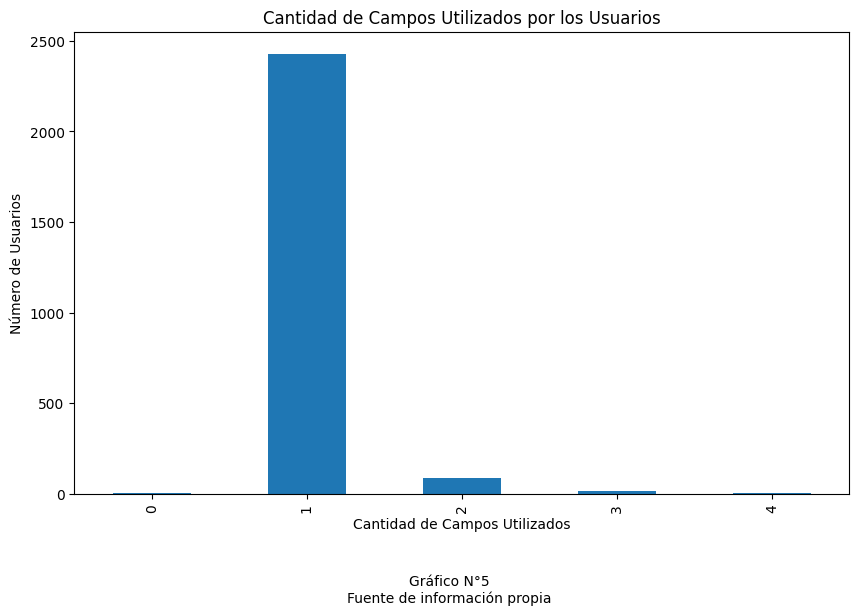

In [40]:
# Contamos la cantidad de veces que se utiliza cada cantidad de campos
cant_campos = df_filtrado['cant_campos_utilizados'].value_counts().sort_index()
print(cant_campos)

# Gráfico de barras para la cantidad de campos utilizados por los usuarios
plt.figure(figsize=(10, 6))
cant_campos.plot(kind='bar')
plt.xlabel('Cantidad de Campos Utilizados')
plt.ylabel('Número de Usuarios')
plt.title('Cantidad de Campos Utilizados por los Usuarios')
plt.figtext(0.5, -0.05, 'Gráfico N°5\nFuente de información propia', ha='center', va='center')
plt.show()

kw          1808
au           252
mc-itype     162
ti           134
su            64
an            64
itype         44
BC            34
su-to         30
bc            30
callnum       23
se             3
I-format       3
AU             3
l-format       2
not au         1
Provider       1
In             1
bx             1
Name: count, dtype: int64


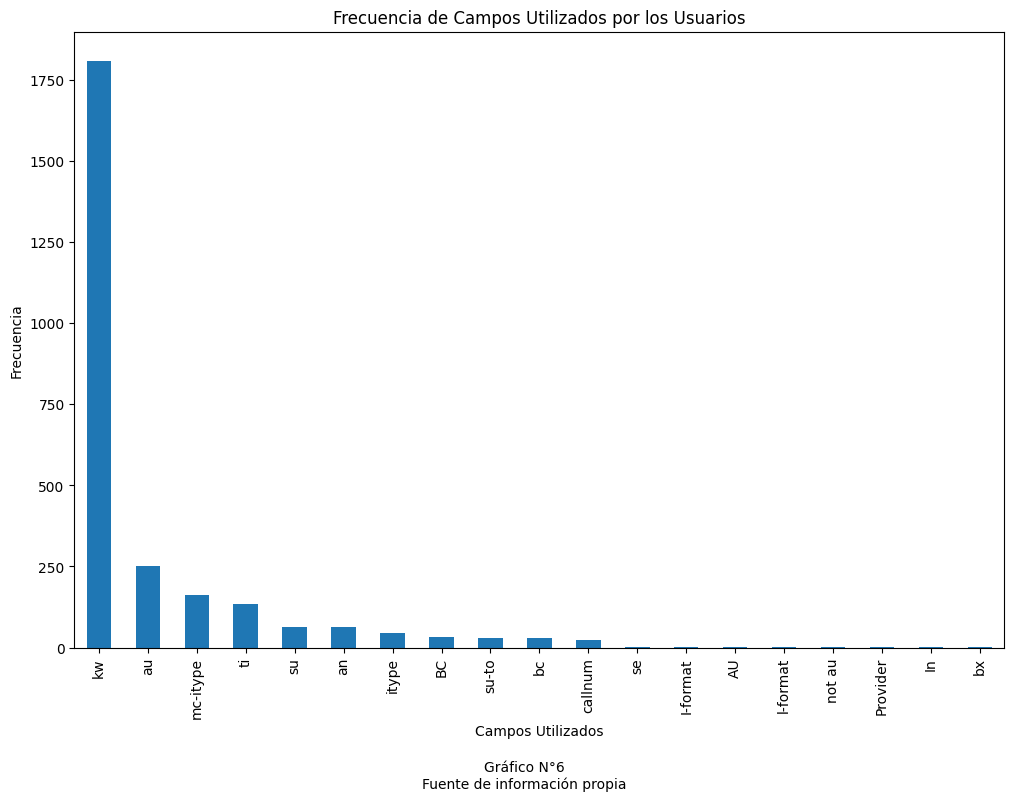

In [41]:
# Contamos la frecuencia de cada campo utilizado
frecuencia_campos = df_filtrado['campo_utilizado'].str.split(', ', expand=True).stack().value_counts()
print(frecuencia_campos)

# Gráfico de las frecuencias de los campos utilizados por los usuarios
plt.figure(figsize=(12, 8))
frecuencia_campos.plot(kind='bar')
plt.xlabel('Campos Utilizados')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Campos Utilizados por los Usuarios')
plt.figtext(0.5, -0.05, 'Gráfico N°6\nFuente de información propia', ha='center', va='center')
plt.show()

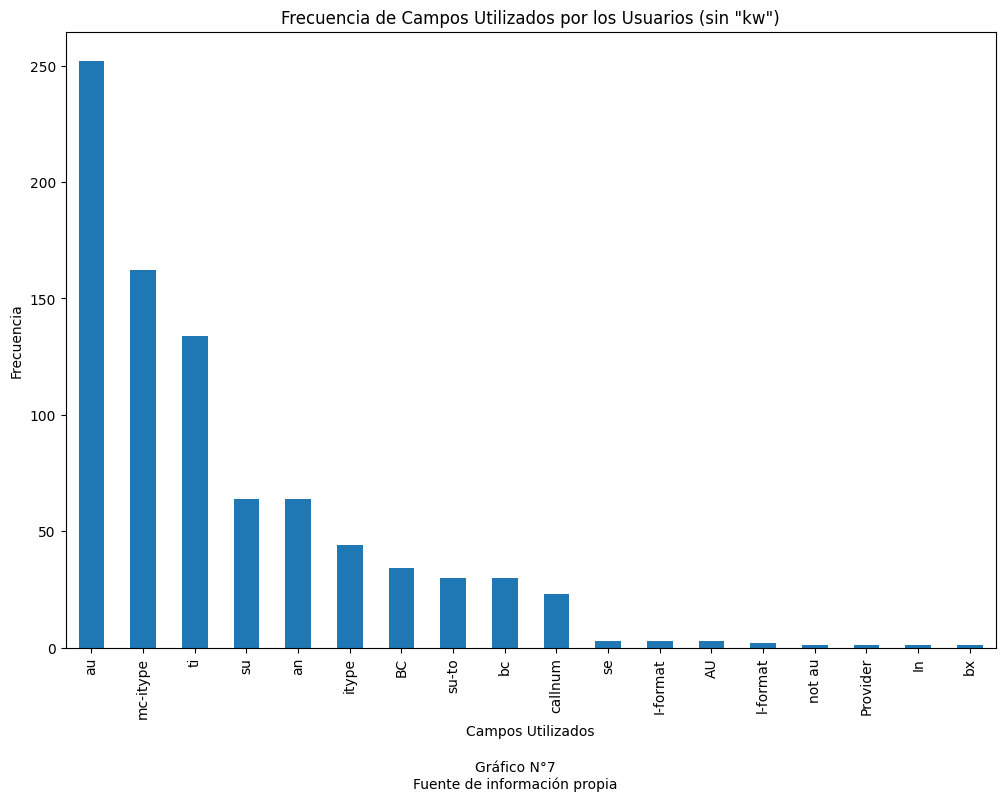

In [43]:
# Filtramos la serie para excluir el campo 'kw'
frecuencia_campos_sin_kw = frecuencia_campos.drop('kw')

# Gráfico de las frecuencias de los campos utilizados por los usuarios sin 'kw'
plt.figure(figsize=(12, 8))
frecuencia_campos_sin_kw.plot(kind='bar')
plt.xlabel('Campos Utilizados')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Campos Utilizados por los Usuarios (sin "kw")')
plt.figtext(0.5, -0.05, 'Gráfico N°7\nFuente de información propia', ha='center', va='center')
plt.show()